# ***IMPORT LIBRARY***


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

# ***PREPROCESSING***

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/PalmHand/Train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/PalmHand/Validate',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 120 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
train_set.class_indices

{'PalmarLeft': 0, 'dorsalLeft': 1, 'dorsalRight': 2, 'palmarRight': 3}

# ***CREATE MODEL***

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     

     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(4,activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                 

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# ***TRAINNING MODEL***

In [ ]:
history = model.fit(train_set,batch_size=5,epochs=5,verbose=1,validation_data=test_set)

Epoch 1/5
10/10 [==============================] - 3s 323ms/step - loss: 0.5930 - accuracy: 0.7833 - val_loss: 2.0720 - val_accuracy: 0.4500
Epoch 2/5
10/10 [==============================] - 3s 297ms/step - loss: 0.4268 - accuracy: 0.8500 - val_loss: 2.5893 - val_accuracy: 0.5000
Epoch 3/5
10/10 [==============================] - 3s 294ms/step - loss: 0.4323 - accuracy: 0.8333 - val_loss: 2.2586 - val_accuracy: 0.2500
Epoch 4/5
10/10 [==============================] - 3s 298ms/step - loss: 0.5342 - accuracy: 0.7750 - val_loss: 2.1582 - val_accuracy: 0.5000
Epoch 5/5
10/10 [==============================] - 3s 306ms/step - loss: 0.3574 - accuracy: 0.9000 - val_loss: 2.1885 - val_accuracy: 0.5500


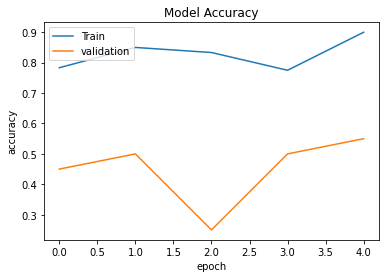

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

# ***EVALUATE***

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Loss: ',score[0])
print('Accuracy: ',score[1])

2/2 [==============================] - 0s 158ms/step - loss: 2.1885 - accuracy: 0.5500
Loss:  2.1884994506835938
Accuracy:  0.550000011920929


In [ ]:
model.save('PalmHand.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('PalmHand.h5')

# ***TESTING***

In [ ]:

def predict(result):
  if result.round()[0,0]==1:
    print('dự đoán: tay trái ngửa')
  elif result.round()[0,1]==1:
    print('dự đoán: tay trái úp')
  elif result.round()[0,2]==1:
    print('dự đoán: tay phải úp')
  elif result.round()[0,3]==1:
    print('dự đoán: tay phải ngửa')


dự đoán: tay phải ngửa


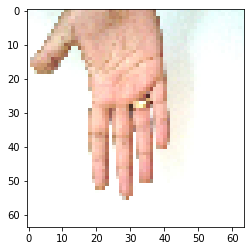

In [ ]:
test_img=load_img('/content/drive/MyDrive/PalmHand/Test/palmarRight/Hand_0000267.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)


dự đoán: tay phải úp


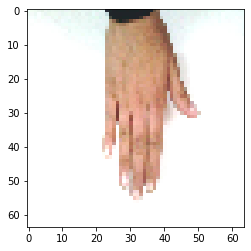

In [ ]:
test_img=load_img('/content/drive/MyDrive/PalmHand/Test/dorsalRight/Hand_0000227.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

dự đoán: tay phải ngửa


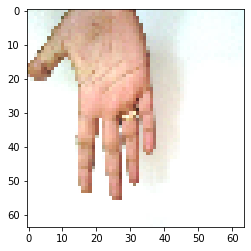

In [ ]:
test_img=load_img('/content/drive/MyDrive/PalmHand/Test/palmarRight/Hand_0000270.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)